In [137]:
%matplotlib inline
import pandas as pd # Import the pandas library
import matplotlib.pyplot as plt # Import the pyplot module

In [158]:
# Read the CSV file
df = pd.read_csv('Resources/tech_survey.csv')


**TELLING THE STORY:**
Using our Dataframe, we start by Analyzing the Impact of Mental Health on Work Performance

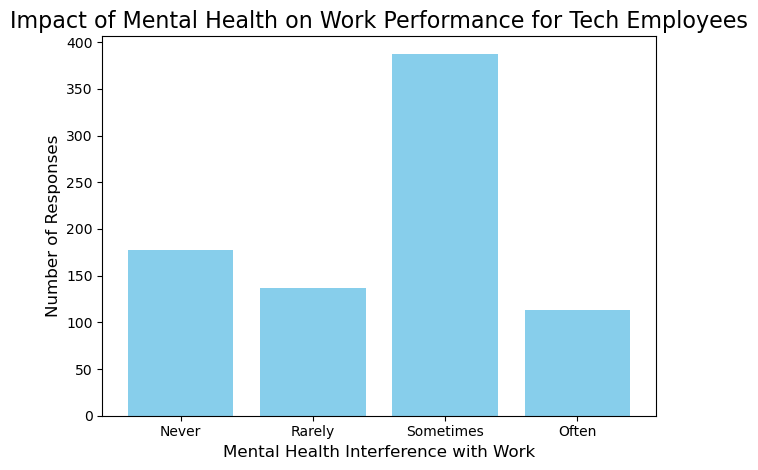

In [139]:

# Filter responses to include only tech employees
tech_employees_df = df[df['tech_company'] == 'Yes']
# Drop NaN values in 'work_interfere' to focus on meaningful responses
tech_employees_df = tech_employees_df.dropna(subset=['work_interfere'])

# Get value counts for 'work_interfere' 
work_interfere_counts = tech_employees_df['work_interfere'].value_counts().reindex(['Never', 'Rarely', 'Sometimes', 'Often'], fill_value=0)

# Plot using matplotlib
plt.bar(work_interfere_counts.index, work_interfere_counts.values, color='skyblue')

# Create chart titles
plt.title('Impact of Mental Health on Work Performance for Tech Employees', fontsize=16)
plt.xlabel('Mental Health Interference with Work', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Next, we want to see the Percentage of Tech Employees seeking treatment for a mental health conditions

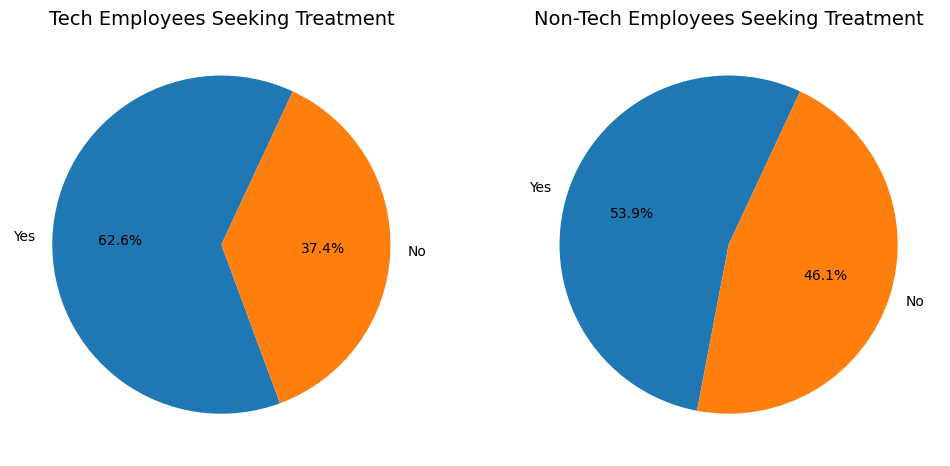

In [140]:
# Filter out non-tech employees
non_tech_employees_df = df[df['tech_company'] != 'Yes']

# Drop missing values in 'treatment' column for both DataFrames
tech_employees_df = tech_employees_df.dropna(subset=['treatment'])
non_tech_employees_df = non_tech_employees_df.dropna(subset=['treatment'])

# Get value counts for 'treatment' in both tech and non-tech employees
tech_treatment_counts = tech_employees_df['treatment'].value_counts()
non_tech_treatment_counts = non_tech_employees_df['treatment'].value_counts()

# Create a figure with 1 row and 2 columns for side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for tech employees
axes[0].pie(tech_treatment_counts, labels=tech_treatment_counts.index, autopct='%1.1f%%', startangle=65)
axes[0].set_title('Tech Employees Seeking Treatment', fontsize=14)

# Plot for non-tech employees
axes[1].pie(non_tech_treatment_counts, labels=non_tech_treatment_counts.index, autopct='%1.1f%%', startangle=65)
axes[1].set_title('Non-Tech Employees Seeking Treatment', fontsize=14)

# Display the plot
plt.show()

Do workers know they can get help? Let's find out how many are aware of mental health resources, if they are available, and what types of care options exist

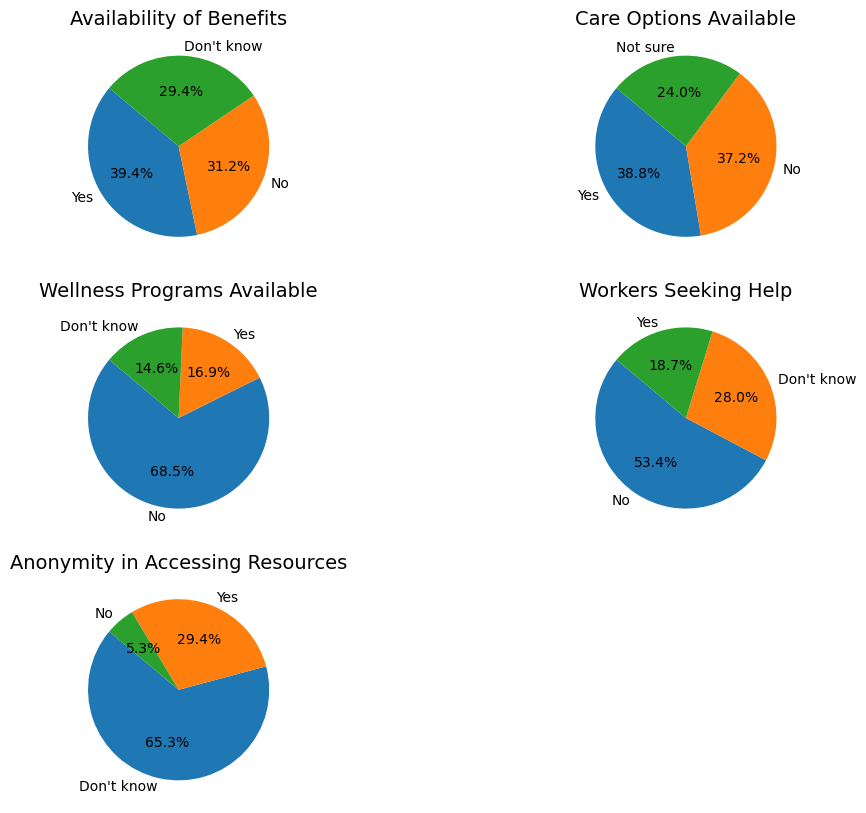

In [141]:
# Drop NaN values in the following columns to clean data
resource_columns = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']
tech_employees_df = tech_employees_df.dropna(subset=resource_columns)

# Get value counts for each resource-related question
resource_availability = {column: tech_employees_df[column].value_counts() for column in resource_columns}

# Plotting the availability of mental health resources using subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easier indexing

# Manually create pie charts for each resource question using the looped data

# Pie chart 1 (benefits)
counts_1 = resource_availability['benefits']  # Data from the loop
axes[0].pie(counts_1, labels=counts_1.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Availability of Benefits', fontsize=14)

# Pie chart 2 (care_options)
counts_2 = resource_availability['care_options']  # Data from the loop
axes[1].pie(counts_2, labels=counts_2.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Care Options Available', fontsize=14)

# Pie chart 3 (wellness_program)
counts_3 = resource_availability['wellness_program']  # Data from the loop
axes[2].pie(counts_3, labels=counts_3.index, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Wellness Programs Available', fontsize=14)

# Pie chart 4 (seek_help)
counts_4 = resource_availability['seek_help']  # Data from the loop
axes[3].pie(counts_4, labels=counts_4.index, autopct='%1.1f%%', startangle=140)
axes[3].set_title('Workers Seeking Help', fontsize=14)

# Pie chart 5 (anonymity)
counts_5 = resource_availability['anonymity']  # Data from the loop
axes[4].pie(counts_5, labels=counts_5.index, autopct='%1.1f%%', startangle=140)
axes[4].set_title('Anonymity in Accessing Resources', fontsize=14)

# Remove the empty subplot (6th one)
fig.delaxes(axes[5])


# Display the plot
plt.show()


Will there be Consequences for Discussing Mental Health Issues at work? What is the Perception?

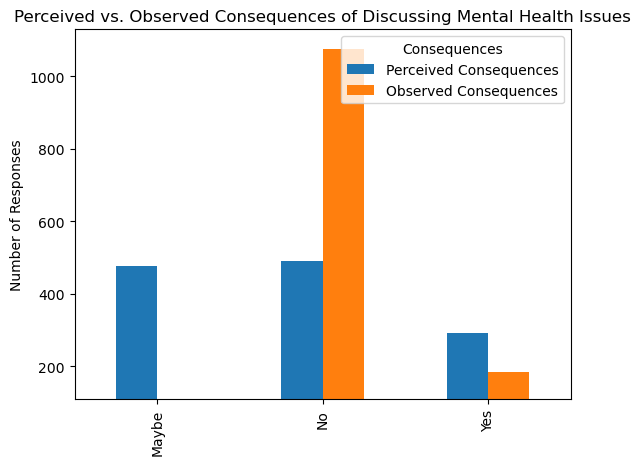

In [157]:
# Filter relevant data 
stigma_data = df[['mental_health_consequence', 'obs_consequence']]

# Analyze Stigmatization
# Count responses for perceived mental health consequences
perceived_counts = stigma_data['mental_health_consequence'].value_counts()

# Count responses for observed consequences for coworkers
observed_counts = stigma_data['obs_consequence'].value_counts()

# Create a DataFrame to combine both counts for plotting
combined_counts = pd.DataFrame({
    'Perceived Consequences': perceived_counts,
    'Observed Consequences': observed_counts
}).fillna(0)  # Fill NaN with 0 for missing values

# Create a grouped bar chart for perceived vs. observed consequences
combined_counts.plot(kind='bar')
plt.title('Perceived vs. Observed Consequences of Discussing Mental Health Issues')
plt.ylabel('Number of Responses')
plt.ylim(110)
plt.legend(title='Consequences', loc='upper right')
plt.show()


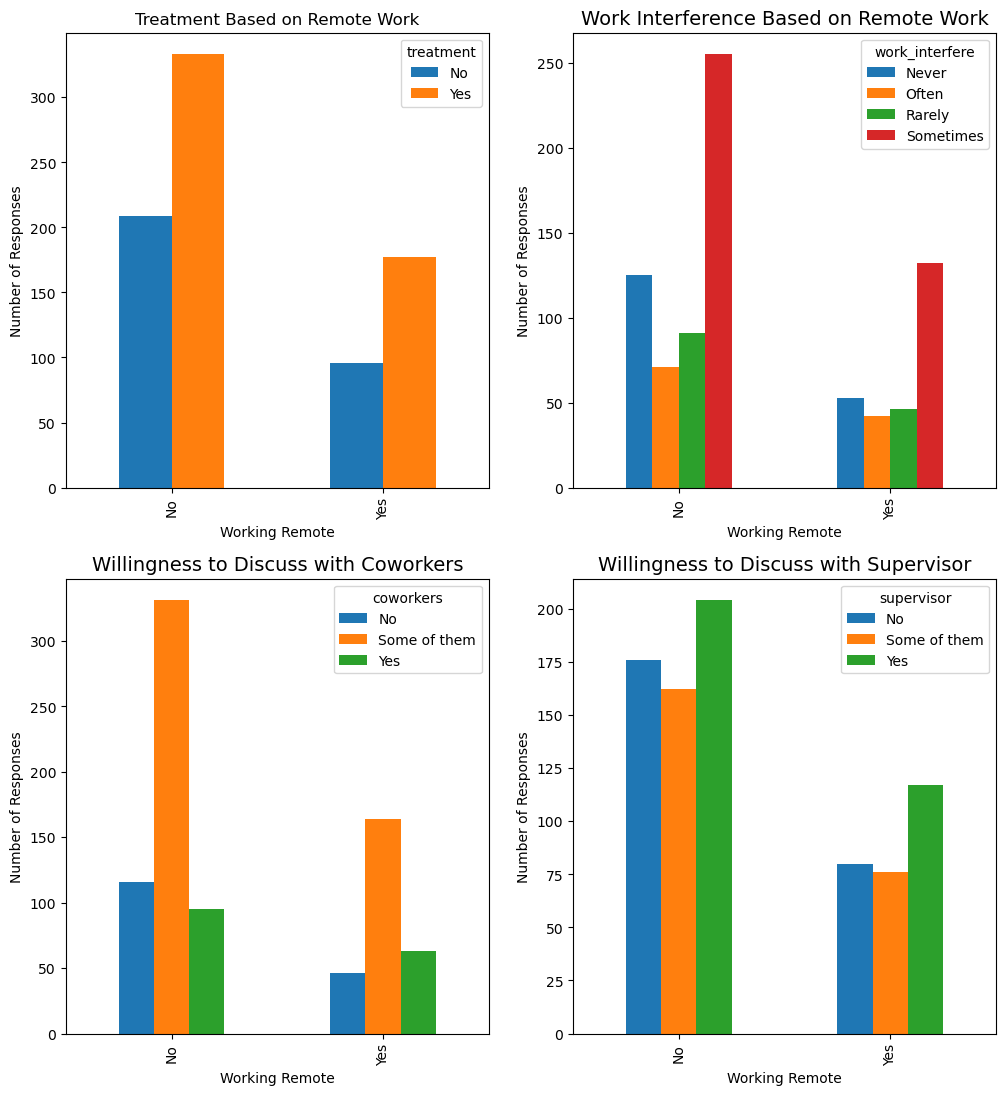

In [143]:
# Drop NaN values in relevant columns
mental_health_columns = ['remote_work', 'treatment', 'work_interfere', 'coworkers', 'supervisor']
tech_employees_df = tech_employees_df.dropna(subset=mental_health_columns)

# Count responses for treatment based on remote work status
treatment_counts = tech_employees_df.groupby('remote_work')['treatment'].value_counts().unstack(fill_value=0)

#Count responses for work interference based on remote work status
work_interfere_counts = tech_employees_df.groupby('remote_work')['work_interfere'].value_counts().unstack(fill_value=0)

# Count willingness to discuss mental health based on remote work status
coworkers_counts = tech_employees_df.groupby('remote_work')['coworkers'].value_counts().unstack(fill_value=0)
supervisor_counts = tech_employees_df.groupby('remote_work')['supervisor'].value_counts().unstack(fill_value=0)

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 13))

# Treatment plot
treatment_counts.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Treatment Based on Remote Work')
axes[0, 0].set_ylabel('Number of Responses')
axes[0, 0].set_xlabel('Working Remote')

# Work Interference plot
work_interfere_counts.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Work Interference Based on Remote Work', fontsize=14)
axes[0, 1].set_ylabel('Number of Responses')
axes[0, 1].set_xlabel('Working Remote')

# Willingness to Discuss with Coworkers plot
coworkers_counts.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Willingness to Discuss with Coworkers', fontsize=14)
axes[1, 0].set_ylabel('Number of Responses')
axes[1, 0].set_xlabel('Working Remote')

# Willingness to Discuss with Supervisor plot
supervisor_counts.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Willingness to Discuss with Supervisor', fontsize=14)
axes[1, 1].set_ylabel('Number of Responses')
axes[1, 1].set_xlabel('Working Remote')

plt.show()

